In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
%matplotlib inline

# Extract data

The code extracts the average throughput data from the log file

In [2]:
import re
import os

def read_throughput(input_files, data=None):
    print(input_files)
    # Regular expression pattern to match the Mops/s value
    patterns = [r'readall\s+:\s+\d+\.\d+\smicros/op\s+(\d+\.\d+)\sMops/s',
               r'readallwithlr\s+:\s+\d+\.\d+\smicros/op\s+(\d+\.\d+)\sMops/s',
               r'readallwithrs\s+:\s+\d+\.\d+\smicros/op\s+(\d+\.\d+)\sMops/s',
               r'readallwithseg\s+:\s+\d+\.\d+\smicros/op\s+(\d+\.\d+)\sMops/s']
    benchmarks = ['readall', 'readallwithlr', 'readallwithrs', 'readallwithseg']
    if data == None:
        # data = [["dataset", "readall", "readallwithlr", "readallwithrs", "readallwithseg"]]
        data = [["dataset", "LeanStore", "LinearReg", "BinarySearch", "AttachedOnNode"]]
    # Open the input file and read the contents
    for input_file in input_files:
        with open(input_file, 'r') as file:
            row = [os.path.basename(input_file)[:-7]]
            content = file.read()
            # Find all matches of the pattern in the content
            for pattern in patterns:
                matches = re.findall(pattern, content)
                # Prepare the data for CSV writing
                for i, match in enumerate(matches):
                    benchmark = benchmarks[i]
                    mops = float(match)
                    row.append(mops)
                    # print(f'{benchmark}: {mops} Mops/s')
            data.append(row)
    return data
    # print(data)

In [3]:
dataset = ["linear", "pieceLinear", "books", "fb", "lognormal", "normal", "uniform_sparse", "uniform_dense","lineargen", "randomgen"]
datasets = [f'../logs/{d}_rs.log' for d in dataset]
data = read_throughput(datasets)

['../logs/linear_rs.log', '../logs/pieceLinear_rs.log', '../logs/books_rs.log', '../logs/fb_rs.log', '../logs/lognormal_rs.log', '../logs/normal_rs.log', '../logs/uniform_sparse_rs.log', '../logs/uniform_dense_rs.log', '../logs/lineargen_rs.log', '../logs/randomgen_rs.log']


In [4]:
data

[['dataset', 'LeanStore', 'LinearReg', 'BinarySearch', 'AttachedOnNode'],
 ['linear', 0.891953, 1.360313, 1.387547, 1.247687],
 ['pieceLinear', 0.885182, 0.66776, 1.301088, 1.138697],
 ['books', 1.011511, 0.806695, 1.184555, 0.978662],
 ['fb', 0.927369, 0.893571, 1.059831, 0.856338],
 ['lognormal', 0.975387, 0.901426, 1.238956, 1.051257],
 ['normal', 1.007072, 0.597149, 1.207815, 1.058788],
 ['uniform_sparse', 1.005024, 1.043918, 1.202426, 1.02185],
 ['uniform_dense', 0.899914, 1.398975, 1.414139, 1.27741],
 ['lineargen', 0.890292, 1.361419, 1.377081, 1.250148],
 ['randomgen', 0.971446, 0.705245, 1.19417, 1.010873]]

In [5]:
df = pd.DataFrame(data[1:], columns=data[0])
df.set_index('dataset', inplace=True)

In [6]:
df

,LeanStore,LinearReg,BinarySearch,AttachedOnNode
dataset,,,,
linear,0.891953,1.360313,1.387547,1.247687
pieceLinear,0.885182,0.667760,1.301088,1.138697
books,1.011511,0.806695,1.184555,0.978662
fb,0.927369,0.893571,1.059831,0.856338
lognormal,0.975387,0.901426,1.238956,1.051257
normal,1.007072,0.597149,1.207815,1.058788
uniform_sparse,1.005024,1.043918,1.202426,1.021850
uniform_dense,0.899914,1.398975,1.414139,1.277410
lineargen,0.890292,1.361419,1.377081,1.250148


In [19]:
#%%writefile bar.py
import matplotlib.pyplot as plt
import numpy as np

def bar_(df):
    fig, ax = plt.subplots()
    x = np.arange(len(df.index.tolist()))
    ax.bar(x,df["improvement"],width=0.6)
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Improvement (%)")
    # ax.set_title("Improvement of LeanStore when using Learned Index to jump to leaf node")
    # print(df.index.tolist())
    ax.set_xticks(x,df.index.tolist())
    ax.set_xticklabels(df.columns.tolist(), rotation=45)
    return fig, ax

In [15]:
# %%writefile grouped_bar.py

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

def grouped_bar_(df, categories, datasets):
    # Generate a color map with num_categories colors
    cmap = plt.get_cmap('tab20c')

    # Generate a list of colors
    colors = [cmap(i) for i in np.linspace(0, 1, len(categories))]
    # Define colors for each dataset
    # colors = ['#1f77b4', '#ff7f0e']

    # Create a figure and axis object
    fig, ax = plt.subplots()

    bar_width = 0.8 / len(categories)

    # x_pos = [i for i in range(len(datasets))]
    x_pos = np.arange(len(datasets))

    # Create a grouped bar chart for each dataset
    for j, category in enumerate(categories):
        # values = np.ndarray([df[dataset].tolist()[j] for dataset in datasets])
        # values = [df[dataset].tolist()[j] for dataset in datasets]
        values = df[category].loc[datasets].tolist()
        # x_positions = [ i  + j * bar_width for i in x_pos]
        x_positions = x_pos + j * bar_width
        ax.bar(x_positions, values, width=bar_width, label=category, color=colors[j])
    # Set the chart properties
    ax.set_xticks(x_pos)
    ax.set_xticklabels(datasets,
                    rotation=45, horizontalalignment='right')
    # Set chart properties
    # ax.set_title('Throughput for each dataset')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Throughput (Mops/s)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    return fig, ax

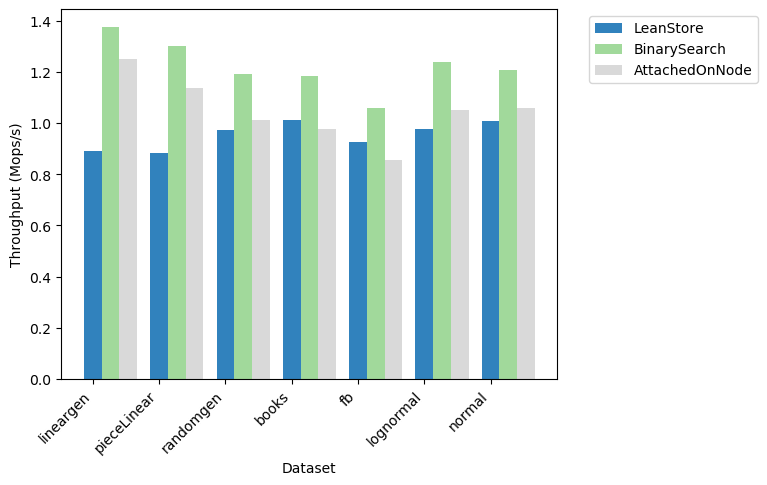

In [16]:

# Define datasets and categories
# categories = df.columns.tolist()
# datasets = df.index.tolist()
categories = ["LeanStore", "BinarySearch", "AttachedOnNode"]
datasets = ["lineargen","pieceLinear", "randomgen","books", "fb", "lognormal", "normal"]

fig, ax = grouped_bar_(df, categories, datasets)
fig.savefig('../logs/readonly_improvement.png', bbox_inches='tight')

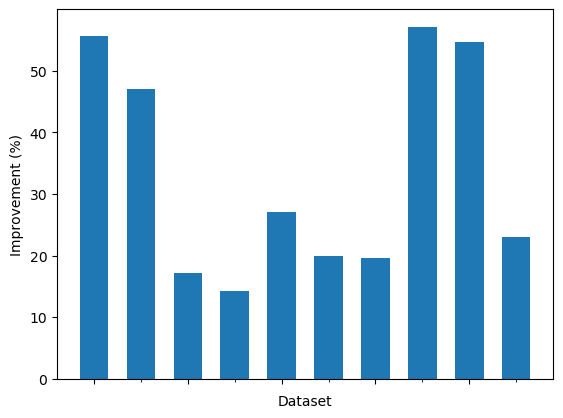

In [21]:
newdf = pd.DataFrame()
newdf["improvement"] = (-df["LeanStore"] + df["BinarySearch"]) / df["LeanStore"] * 100
fig, ax = bar_(newdf)
fig.savefig("../logs/rs_improvement.png", bbox_inches='tight')

In [22]:
newdf = pd.DataFrame()
newdf["improvement"] = (-df["LeanStore"] + df["LearnedStore"]) / df["LeanStore"] * 100
newdf = newdf.loc[["linear", "pieceLinear","normal"]]
fig, ax = bar_(newdf)

fig.savefig("../logs/seg_improvement.png", bbox_inches='tight')

KeyError: 'LearnedStore'

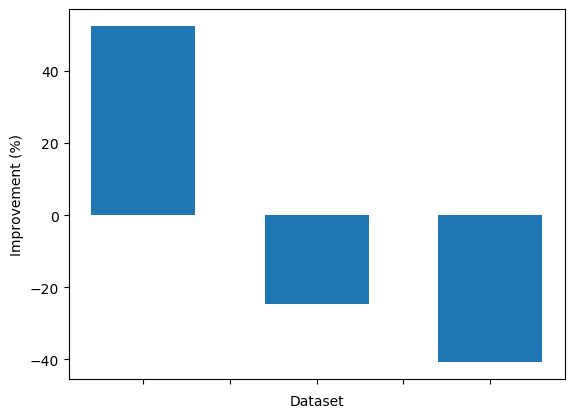

In [23]:
newdf = pd.DataFrame()
newdf["improvement"] = (-df["LeanStore"] + df["LinearReg"]) / df["LeanStore"] * 100
newdf = newdf.loc[['linear', 'pieceLinear','normal']]
fig, ax = bar_(newdf)
fig.savefig("../logs/lr_improvement.png", bbox_inches='tight')